## CP SERS PARTE 3


*   Igor Zuvela Villaça Felicio - RM 563602




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

26. Carregamento e inspeção inicial
- Carregue o dataset no Pandas.
- Liste tipos de dados e estatísticas descritivas (.info() e .describe()).


In [ ]:
df = pd.read_csv('/content/sample_data/energydata_complete.csv')

In [ ]:
df.info()
df.describe()

27. Distribuição do consumo
- Crie histogramas e séries temporais para a variável Appliances.
- Pergunta: o consumo tende a se concentrar em valores baixos ou altos?

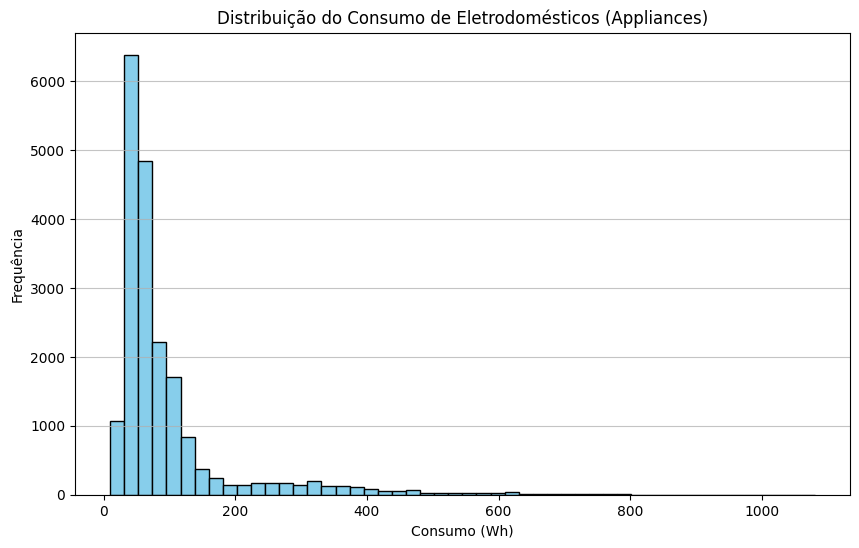

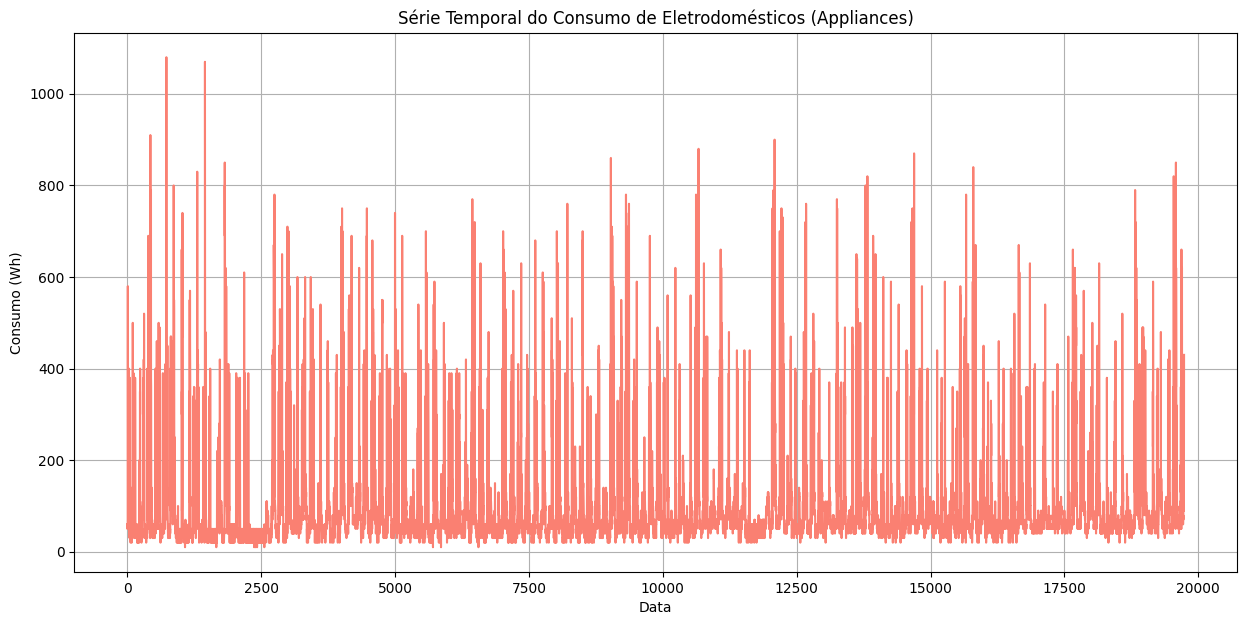

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Appliances'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribuição do Consumo de Eletrodomésticos (Appliances)')
plt.xlabel('Consumo (Wh)')
plt.ylabel('Frequência')
plt.grid(axis='y', alpha=0.75)
plt.show()

plt.figure(figsize=(15, 7))
df['Appliances'].plot(color='salmon')
plt.title('Série Temporal do Consumo de Eletrodomésticos (Appliances)')
plt.xlabel('Data')
plt.ylabel('Consumo (Wh)')
plt.grid(True)
plt.show()

RESPOSTA: O consumo tende a se concentrar em valores mais baixos.

28. Correlações com variáveis ambientais
- Calcule correlações entre Appliances e variáveis como temperatura e umidade.
- Pergunta: quais fatores têm mais relação com o consumo

Maiores : Appliances    1.000000
lights        0.197278
T2            0.120073
T6            0.117638
T_out         0.099155
Windspeed     0.087122
RH_1          0.086031
T3            0.085060
T1            0.055447
T4            0.040281
Name: Appliances, dtype: float64
Menores : Visibility     0.000230
rv1           -0.011145
rv2           -0.011145
Press_mm_hg   -0.034885
RH_9          -0.051462
RH_7          -0.055642
RH_2          -0.060465
RH_6          -0.083178
RH_8          -0.094039
RH_out        -0.152282
Name: Appliances, dtype: float64


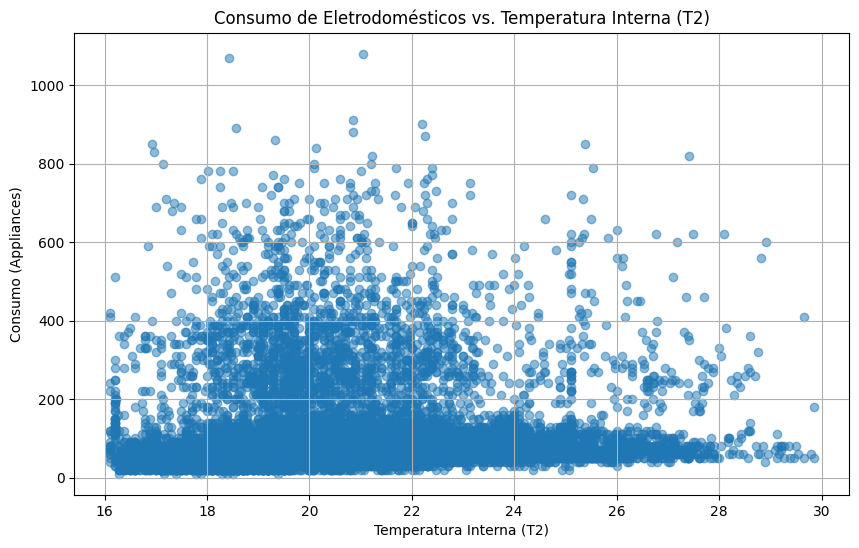

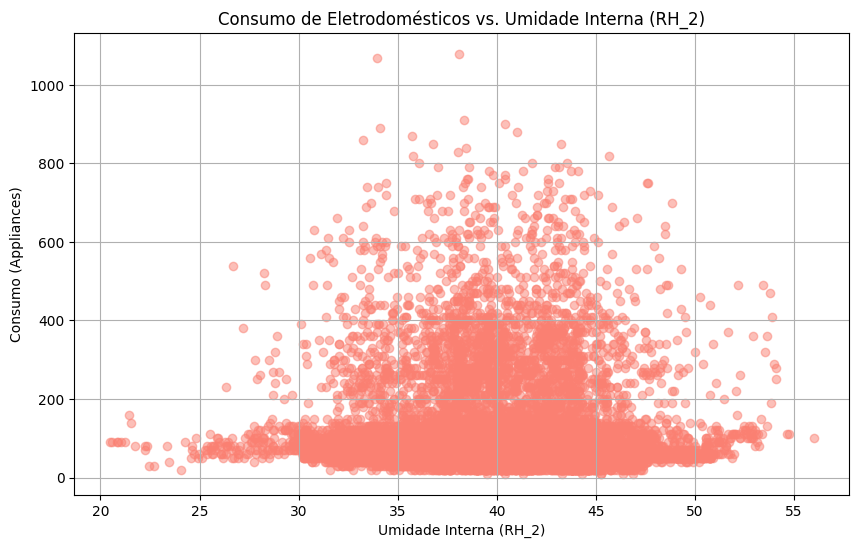

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
appliances_corr = correlation_matrix['Appliances'].sort_values(ascending=False)
print(f'Maiores : {appliances_corr.head(10)}')
print(f'Menores : {appliances_corr.tail(10)}')

temp_col = 'T2'
humidity_col = 'RH_2'

#grafico 1
plt.figure(figsize=(10, 6))
plt.scatter(df[temp_col], df['Appliances'], alpha=0.5)
plt.title(f'Consumo de Eletrodomésticos vs. Temperatura Interna ({temp_col})')
plt.xlabel(f'Temperatura Interna ({temp_col})')
plt.ylabel('Consumo (Appliances)')
plt.grid(True)
plt.show()

# grafico 2
plt.figure(figsize=(10, 6))
plt.scatter(df[humidity_col], df['Appliances'], alpha=0.5, color='salmon')
plt.title(f'Consumo de Eletrodomésticos vs. Umidade Interna ({humidity_col})')
plt.xlabel(f'Umidade Interna ({humidity_col})')
plt.ylabel('Consumo (Appliances)')
plt.grid(True)
plt.show()

29. Normalização dos dados
- Aplique Min-Max Scaling às variáveis numéricas.
- Reutilize esses dados em modelos posteriores.


In [ ]:
# colunas numericas selecionadas
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df[numeric_cols])

df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print(df_scaled.head())

# df normalizado
df_scaled.to_csv("energydata_normalizado.csv", index=False)


                  date  Appliances    lights       T1      RH_1        T2  \
0  2016-01-11 17:00:00    0.046729  0.428571  0.32735  0.566187  0.225345   
1  2016-01-11 17:10:00    0.046729  0.428571  0.32735  0.541326  0.225345   
2  2016-01-11 17:20:00    0.037383  0.428571  0.32735  0.530502  0.225345   
3  2016-01-11 17:30:00    0.037383  0.571429  0.32735  0.524080  0.225345   
4  2016-01-11 17:40:00    0.046729  0.571429  0.32735  0.531419  0.225345   

       RH_2        T3      RH_3        T4  ...        T9      RH_9     T_out  \
0  0.684038  0.215188  0.746066  0.351351  ...  0.223032  0.677290  0.372990   
1  0.682140  0.215188  0.748871  0.351351  ...  0.226500  0.678532  0.369239   
2  0.679445  0.215188  0.755569  0.344745  ...  0.219563  0.676049  0.365488   
3  0.678414  0.215188  0.758685  0.341441  ...  0.219563  0.671909  0.361736   
4  0.676727  0.215188  0.758685  0.341441  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoi

30. PCA
- Aplique PCA e reduza para 2 componentes principais.
- Plote os dados resultantes.
- Pergunta: aparecem padrões ou agrupamentos naturais?

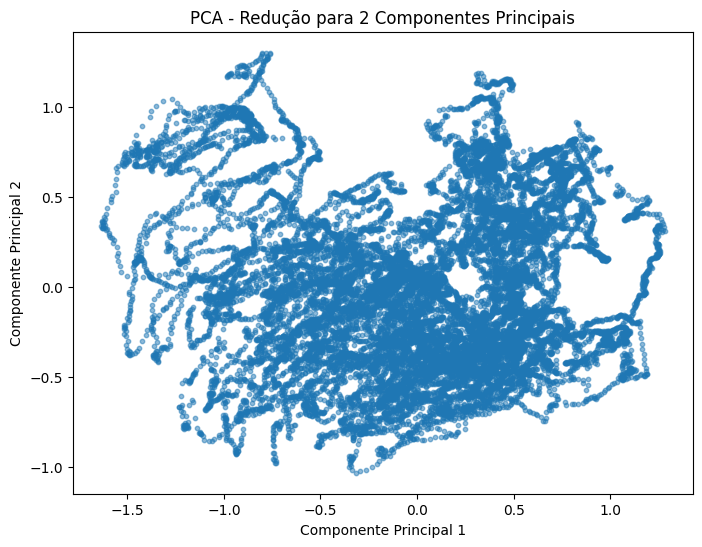

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8,6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.5, s=10)
plt.title("PCA - Redução para 2 Componentes Principais")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

RESPOSTA : Os agrupamentos maiores estão entre 0 e 0.5

31. Regressão Linear Múltipla
- Modele Appliances em função das variáveis ambientais.
- Avalie R² e erro médio

In [ ]:
y = df["Appliances"]
# selecionando variaveis ambientais
X = df[["T1", "RH_1", "T2", "RH_2", "T3", "RH_3",
        "T4", "RH_4", "T5", "RH_5", "T6", "RH_6",
        "T7", "RH_7", "T8", "RH_8", "T9", "RH_9",
        "T_out", "Press_mm_hg", "RH_out", "Windspeed",
        "Visibility", "Tdewpoint"]]

# 70% e 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lin = lin_model.predict(X_test)

r2_lin = r2_score(y_test, y_pred_lin)
mae_lin = mean_absolute_error(y_test, y_pred_lin)
rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))

print(" -- Regressão Linear Múltipla --")
print(f"R²: {r2_lin:.4f}")
print(f"MAE: {mae_lin:.2f}")
print(f"RMSE: {rmse_lin:.2f}")

 -- Regressão Linear Múltipla --
R²: 0.1346
MAE: 53.67
RMSE: 95.75


32. Random Forest Regressor
- Treine um modelo de Random Forest para prever Appliances.
- Compare o RMSE com a regressão linear.


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

rf_model = RandomForestRegressor(n_estimators=100, random_state=31)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

print("\n-- Random Forest Regressor --")
print(f"R²: {r2_rf:.4f}")
print(f"MAE: {mae_rf:.2f}")
print(f"RMSE: {rmse_rf:.2f}")

# Comparação
print("\n-- Comparação de RMSE: --")
print(f"Regressão Linear → {rmse_lin:.2f}")
print(f"Random Forest → {rmse_rf:.2f}")


-- Random Forest Regressor --
R²: 0.5282
MAE: 32.50
RMSE: 70.70

-- Comparação de RMSE: --
Regressão Linear → 95.75
Random Forest → 70.70


33. K-Means clustering
- Aplique K-Means com 3 a 5 clusters.
- Interprete os perfis de consumo.


🔎 K-Means com 3 clusters:
Cluster_3
0    108.053560
1     91.133055
2     96.581053
Name: Appliances, dtype: float64


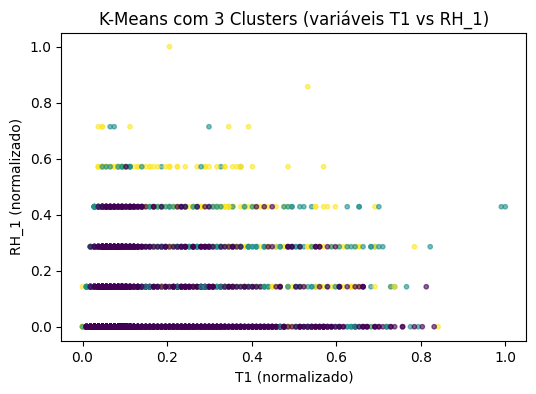


🔎 K-Means com 4 clusters:
Cluster_4
0    109.443685
1     88.035891
2     96.286284
3    102.501655
Name: Appliances, dtype: float64


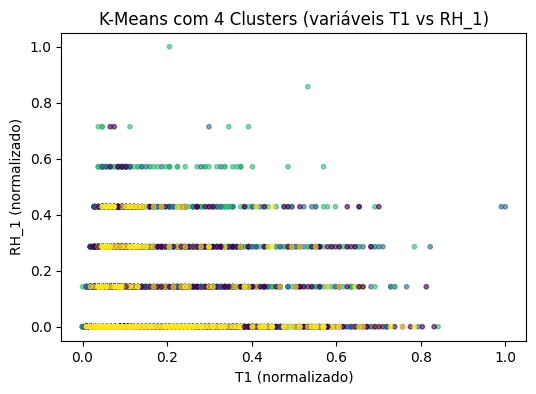


🔎 K-Means com 5 clusters:
Cluster_5
0    116.004195
1     90.937238
2     94.464238
3     90.081984
4    101.672266
Name: Appliances, dtype: float64


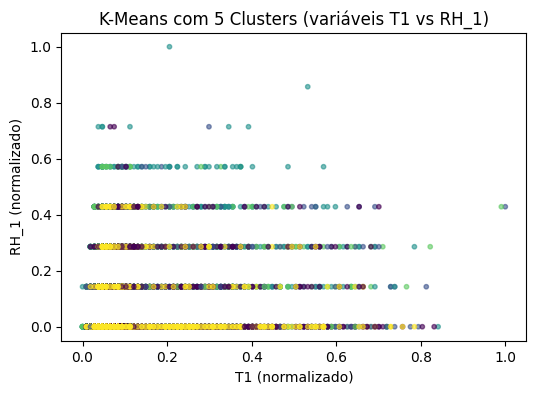

In [ ]:
for k in range(3, 6):
    kmeans = KMeans(n_clusters=k, random_state=36)
    df[f"Cluster_{k}"] = kmeans.fit_predict(X_scaled)
    print(f"\n🔎 K-Means com {k} clusters:")
    print(df.groupby(f"Cluster_{k}")["Appliances"].mean())

    # Plot 2D usando duas variáveis principais
    plt.figure(figsize=(6,4))
    plt.scatter(X_scaled[:,0], X_scaled[:,1], c=df[f"Cluster_{k}"], cmap="viridis", s=10, alpha=0.6)
    plt.title(f"K-Means com {k} Clusters (variáveis T1 vs RH_1)")
    plt.xlabel("T1 (normalizado)")
    plt.ylabel("RH_1 (normalizado)")
    plt.show()

34. Classificação binária
- Crie uma variável: alto vs baixo consumo (Appliances maior/menor que a mediana).
- Treine Logistic Regression e Random Forest Classifier.

In [ ]:
median_consumption = df['Appliances'].median()


df['high_consumption'] = (df['Appliances'] > median_consumption).astype(int)

features = df.drop(columns=['date', 'Appliances', 'lights', 'rv1', 'rv2', 'high_consumption'])
target = df['high_consumption']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=20)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



print("--- Regressão Logística ---")

log_reg = LogisticRegression(random_state=21)
log_reg.fit(X_train_scaled, y_train)


y_pred_log_reg = log_reg.predict(X_test_scaled)

accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Acurácia: {accuracy_log_reg:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg))

print("\n--- Random Forest Classifier ---")

rand_forest = RandomForestClassifier(n_estimators=100, random_state=22, n_jobs=-1)
rand_forest.fit(X_train, y_train)

y_pred_rand_forest = rand_forest.predict(X_test)

accuracy_rand_forest = accuracy_score(y_test, y_pred_rand_forest)
print(f"Acurácia: {accuracy_rand_forest:.4f}")
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rand_forest))

--- Regressão Logística ---
Acurácia: 0.7532

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      2138
           1       0.74      0.71      0.73      1809

    accuracy                           0.75      3947
   macro avg       0.75      0.75      0.75      3947
weighted avg       0.75      0.75      0.75      3947


--- Random Forest Classifier ---
Acurácia: 0.8976

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2138
           1       0.90      0.88      0.89      1809

    accuracy                           0.90      3947
   macro avg       0.90      0.90      0.90      3947
weighted avg       0.90      0.90      0.90      3947



35. Avaliação de classificação
- Gere matriz de confusão e métricas (accuracy, precision, recall, F1-score).
- Pergunta: o modelo erra mais para alto ou para baixo consumo?

In [ ]:


# --- Divisão dos Dados ---
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# --- Normalização dos Atributos ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Treinamento e Avaliação da Regressão Logística ---
print("--- Regressão Logística ---")
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_log_reg))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_log_reg))

# --- Treinamento e Avaliação do Random Forest Classifier ---
print("\n--- Random Forest Classifier ---")

rand_forest = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

rand_forest.fit(X_train, y_train)

y_pred_rand_forest = rand_forest.predict(X_test)

print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_rand_forest))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred_rand_forest))

--- Regressão Logística ---
Matriz de Confusão:
[[1681  446]
 [ 518 1302]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      2127
           1       0.74      0.72      0.73      1820

    accuracy                           0.76      3947
   macro avg       0.75      0.75      0.75      3947
weighted avg       0.76      0.76      0.76      3947


--- Random Forest Classifier ---
Matriz de Confusão:
[[1950  177]
 [ 217 1603]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.90      0.92      0.91      2127
           1       0.90      0.88      0.89      1820

    accuracy                           0.90      3947
   macro avg       0.90      0.90      0.90      3947
weighted avg       0.90      0.90      0.90      3947

